**Data Mining SuperStore : Explorasi, Clustering & Klasifikasi**

Langkah 1 : Upload And Load Data

In [1]:
import pandas as pd
df = pd.read_excel('Datasets SuperStore.xlsx')
df.head()

,Row ID,Order ID,Order Date,Year,Month,Day,Ship Mode,Customer ID,Customer Name,Segment,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016,November,8,Second Class,CG-12520,Claire Gute,Consumer,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016,November,8,Second Class,CG-12520,Claire Gute,Consumer,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016,Juni,12,Second Class,DV-13045,Darrin Van Huff,Corporate,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015,Oktober,11,Standard Class,SO-20335,Sean O'Donnell,Consumer,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015,Oktober,11,Standard Class,SO-20335,Sean O'Donnell,Consumer,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Langkah 2 : Exporasi Data

In [2]:
df.info()
print("\nMissing Values: \n", df.isnull().sum())
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Year           9994 non-null   int64         
 4   Month          9994 non-null   object        
 5   Day            9994 non-null   int64         
 6   Ship Mode      9994 non-null   object        
 7   Customer ID    9994 non-null   object        
 8   Customer Name  9994 non-null   object        
 9   Segment        9994 non-null   object        
 10  Country        9994 non-null   object        
 11  City           9994 non-null   object        
 12  State          9994 non-null   object        
 13  Postal Code    9994 non-null   int64         
 14  Region         9994 non-null   object        
 15  Product ID     9994 n

Index(['Row ID', 'Order ID', 'Order Date', 'Year', 'Month', 'Day', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

Langkah 3 : Visualisasi

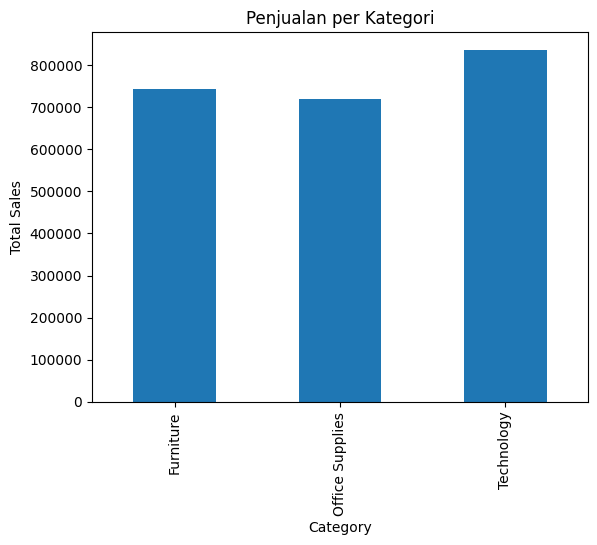

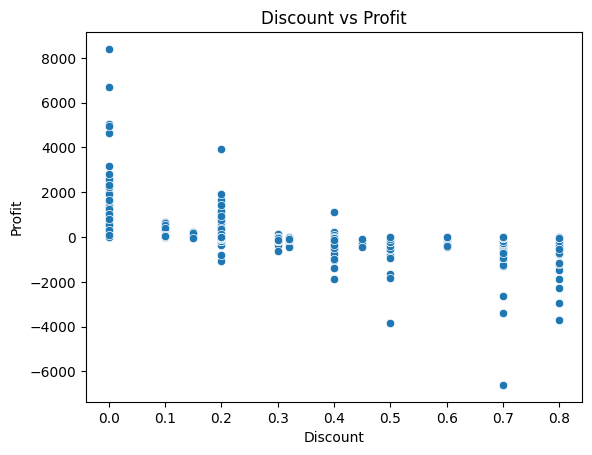

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

df.groupby('Category')['Sales'].sum().plot(kind='bar', title='Penjualan per Kategori')
plt.ylabel('Total Sales')
plt.show()

sns.scatterplot(data = df, x = 'Discount', y = 'Profit')
plt.title('Discount vs Profit')
plt.show()

Langkah 4 : Klasifikasi Untung Rugi

Menggunakan metode Decision Tree

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df['Label'] = df['Profit'].apply(lambda x: 1 if x > 0 else 0)
features = df[['Sales', 'Discount', 'Quantity' ]].fillna(0)
label = df['Label']

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.81      0.81       547
           1       0.96      0.96      0.96      2452

    accuracy                           0.93      2999
   macro avg       0.89      0.88      0.89      2999
weighted avg       0.93      0.93      0.93      2999

Confusion Matrix: 
 [[ 441  106]
 [  96 2356]]


Menggunakan metode KNN (k nearst neighbors)

In [5]:
from sklearn.neighbors import KNeighborsClassifier 

df['Label'] = df['Profit'].apply(lambda x: 1 if x > 0 else 0)
features = df[['Sales', 'Discount', 'Quantity' ]].fillna(0)
label = df['Label']

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.36      0.46       547
           1       0.87      0.96      0.91      2452

    accuracy                           0.85      2999
   macro avg       0.76      0.66      0.69      2999
weighted avg       0.83      0.85      0.83      2999

Confusion Matrix: 
 [[ 197  350]
 [ 104 2348]]


Menggunakan metode Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier

df['Label'] = df['Profit'].apply(lambda x: 1 if x > 0 else 0)
features = df[['Sales', 'Discount', 'Quantity' ]].fillna(0)
label = df['Label']

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.81      0.83       547
           1       0.96      0.97      0.96      2452

    accuracy                           0.94      2999
   macro avg       0.90      0.89      0.89      2999
weighted avg       0.94      0.94      0.94      2999

Confusion Matrix: 
 [[ 443  104]
 [  82 2370]]


----------------


hasil dari klasifikasi menggunakan 3 metode :

- Decision Tree : 0.93 : 93%

- KNN           : 0.85 : 85%

- Random Forest : 0.94 : 94%

-----------

**Kesimpulan**

Perbedaan hasil akurasi dari tiga metode klasifikasi, yaitu Decision Tree (93%), K-Nearest Neighbors (KNN) (85%), dan Random Forest (94%), disebabkan oleh perbedaan cara kerja masing-masing algoritma dalam memproses dan menganalisis data. Decision Tree bekerja dengan membagi data berdasarkan fitur paling informatif dan cocok untuk data dengan pola yang jelas, meskipun berisiko overfitting. Sementara itu, KNN mengklasifikasikan data berdasarkan kedekatan jarak dengan data lain, sehingga performanya menurun jika data mengandung noise, outlier, atau memiliki banyak dimensi. Di sisi lain, Random Forest yang merupakan gabungan dari banyak Decision Tree, memberikan akurasi tertinggi karena mampu mengurangi overfitting dan menghasilkan prediksi yang lebih stabil dan akurat. Oleh karena itu, perbedaan akurasi ini mencerminkan keunggulan dan kelemahan masing-masing metode dalam menangani kompleksitas dan karakteristik data.